<a href="https://colab.research.google.com/github/RaivoKasepuu/LTAT_02_020/blob/main/Praktikum_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 3: Tabelite ühendamine ja andmete visualiseerimine**

#1. Millised on meie andmed?

Oleme siiani vaadanud andmeid, mis kirjeldavad meile erinevaid tehinguid. Tehingute tabelis on iga tehingu kohta järgmised andmed:
- tehingu id,
- tehingu kuupäev,
- kliendi id,
- ostusumma,
- maksevahend.

Selle tabeli abil saame mõningaid asju juba analüüsida. Näiteks saame vaadata, millisel kuupäeval kõige rohkem tehinguid tehti või millist maksevahendit kõige sagedamini kasutati. Eelmises praktikumis võrdlesime näiteks eri maksevahendite kaupa tehingute keskmisi ostusummasid.

Lisaks saime vaadata, kui palju ja milliseid tehinguid iga klient sooritanud on. Selline analüüs aitab meil küll aru saada, milline klient kõige rohkem oste sooritab või kõige rohkem raha sisse toob, aga kuna meil oli andmetabelis üksnes kliendi ID, siis ei saa me selle info põhjal mingeid üldistusi teha. Kui meil oleks iga kliendi kohta teada natuke rohkem informatsiooni, siis saaksime ehk leida seoseid klienti iseloomustavate tunnuste (nt elukoht, vanus) ja tema ostukäitumise vahel. Sellise analüüsiga saame näiteks aimu oma põhilise sihtgrupi kohta, kellele turundustegevuses keskenduma peaks. 

Võtamegi oma analüüsis kasutusele veel ühe andmestiku, kus on iga kliendi kohta toodud järgmised andmed:
- kliendi id,
- kliendi elukoht,
- kliendi vanus.

Tavapäraselt on klientide kohta kogutavaid andmeid ilmselt rohkem - nimi, sünnipäev jms.

Vaatame, millised meie andmed välja näevad.

In [ ]:
#esmalt impordime Pandas teegi
import pandas as pd

In [ ]:
!wget https://courses.cs.ut.ee/2021/atva_stataine/fall/uploads/Main/tehingud_v3.csv
#loeme sisse tehingute tabeli 
tehingud_df = pd.read_csv("tehingud_v3.csv")

--2021-10-08 07:21:58--  https://courses.cs.ut.ee/2021/atva_stataine/fall/uploads/Main/tehingud_v3.csv
Resolving courses.cs.ut.ee (courses.cs.ut.ee)... 193.40.36.57, 193.40.36.55
Connecting to courses.cs.ut.ee (courses.cs.ut.ee)|193.40.36.57|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /LTAT.02.020/2021_fall/uploads/Main/tehingud_v3.csv [following]
--2021-10-08 07:21:59--  https://courses.cs.ut.ee/LTAT.02.020/2021_fall/uploads/Main/tehingud_v3.csv
Reusing existing connection to courses.cs.ut.ee:443.
HTTP request sent, awaiting response... 200 OK
Length: 133961 (131K) [text/csv]
Saving to: ‘tehingud_v3.csv’

tehingud_v3.csv     100%[===================>] 130.82K   334KB/s    in 0.4s    

2021-10-08 07:22:00 (334 KB/s) - ‘tehingud_v3.csv’ saved [133961/133961]



In [ ]:
#vaatame 3 esimest rida, et andmetega tutvuda
display(tehingud_df.head(3))

,tehingu_id,tehingu_kuupäev,kliendi_id,ostusumma,maksevahend
0,1,2015-09-04,1,146.72,arve
1,2,2015-05-15,2,86.96,sularaha
2,3,2017-05-23,2,17.68,kaart


In [ ]:
#loeme sisse klientide tabeli
!wget https://courses.cs.ut.ee/2021/atva_stataine/fall/uploads/Main/kliendid.csv
kliendid_df = pd.read_csv("kliendid.csv")

--2021-10-08 07:22:00--  https://courses.cs.ut.ee/2021/atva_stataine/fall/uploads/Main/kliendid.csv
Resolving courses.cs.ut.ee (courses.cs.ut.ee)... 193.40.36.57, 193.40.36.55
Connecting to courses.cs.ut.ee (courses.cs.ut.ee)|193.40.36.57|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /LTAT.02.020/2021_fall/uploads/Main/kliendid.csv [following]
--2021-10-08 07:22:01--  https://courses.cs.ut.ee/LTAT.02.020/2021_fall/uploads/Main/kliendid.csv
Reusing existing connection to courses.cs.ut.ee:443.
HTTP request sent, awaiting response... 200 OK
Length: 14134 (14K) [text/csv]
Saving to: ‘kliendid.csv’

kliendid.csv        100%[===================>]  13.80K  --.-KB/s    in 0s      

2021-10-08 07:22:01 (337 MB/s) - ‘kliendid.csv’ saved [14134/14134]



In [ ]:
#vaatame 3 esimest rida, et andmetega tutvuda
display(kliendid_df.head(3))

,kliendi_id,kliendi_vanus,kliendi_elukoht
0,1,27,Tallinn
1,2,57,Tartu
2,3,44,Tallinn


Siinkohal on oluline märgata, et kliendid, keda meie uues tabelis kirjeldatud on, on needsamad, kes juba tuttavas tabelis olevaid tehinguid sooritanud on. Vaatame näiteks klienti, kelle id meie andmebaasis on 11. Mis infot me tema kohta esimesest ja teisest tabelist saada võime?

In [ ]:
#vaatame, milliseid tehinguid ta sooritanud on
#võtame tehingute tabelist välja read, kus kliendi id on 11
display(tehingud_df.loc[tehingud_df['kliendi_id']==11])


,tehingu_id,tehingu_kuupäev,kliendi_id,ostusumma,maksevahend
35,36,2017-02-23,11,5.38,kaart
36,37,2017-03-18,11,49.92,kaart
37,38,2017-05-27,11,61.99,kaart


In [ ]:
#vaatame kliendi vanust ja elukohta 
display(kliendid_df.loc[kliendid_df['kliendi_id'] == 11])

,kliendi_id,kliendi_vanus,kliendi_elukoht
10,11,19,Tallinn


**Miks mitte hoida andmeid kõiki ühes suures tabelis?**
Andmeid on vaja eraldi tabelites hoida paljudel põhjustel, näiteks:
- meil võib olla kliente, kes pole ühti ostu sooritanud, või tooteid, mida pole keegi ostnud. Kui meil on ainutl üks suur tabel ostutehingutega, pookides sinna külge kliendi andmed, kes ostis, ja toote andmed, mida osteti, siis osade klientide ja toodete infot seal ei ole. Nii ehk naa on neid andmeid vaja kuskil ju hoida.
- igaks analüüsiks pole kõiki andmeid vaja, seega pole mõtet neid kõiki koos hoida. Hoisutatakse loogiliste gruppide kaupa.
- klientide tabelis on iga kliendi kohta üks rida. Et saada suurest ühendatud tabelist kõikide klientide nimed, on vaja lisaoperatsiooni (freim.unique()).
- andmetabel läheks liiga suureks: kui hoiaksime kõigi poodide kõigi toodete ja kõigi klientide andmeid ühes tabelis oleks see tohutu suur tabel, mida avades me isegi ei hooma seda. Samuti võtaks selle avamine ja sealt andmete otsimine arvutil rohkem aega
- andmekaitse eeskirjad nõuavad, et klientide isikuandmed on talletatud eraldi, väga turvatud viisil ja neid kasutatakse ainult kokkulepitud eesmärkidel. Kui kõik on suurel tabelis näha, siis kuidas me teame, et inimene, kelle ülesanne on toodete ostusummasid arvutada ei vaata muuhulgas ka vana kooliõe telefoninumbrit?


#2. Tabelite ühendamine

## Kahe sarnase sisuga tabeli ühendamine
Näiteks kui meil on andmetabelid septembrist ja oktoobrist ja tahame need ühendada. Või Tallinna poest ja Tartu poest.

Andmete ühendamist ühte tabelisse teise tabeli ridasid juurde lisades nimetatakse **konkateneerimiseks**. See on üsna lihtne juhul kui tabelid on tõesti sarnased ja sisaldavad samu veerge.




In [ ]:
tabeli_esimene_pool = tehingud_df.iloc[:2000]
tabeli_teine_pool = tehingud_df.iloc[2000:]

print(tabeli_esimene_pool.shape)
print(tabeli_teine_pool.shape)

taas_koos = pd.concat([tabeli_esimene_pool,tabeli_teine_pool])
print(display(taas_koos))

#pd.concat([tabeli_esimene_pool,tabeli_teine_pool], axis=0) # axis tähendab, et mööda millist telge andmeid kokku kleebitakse
#see tähendab, et saaksime ka veerge juurde lisada, kasutades axis=1

(2000, 5)
(2181, 5)


,tehingu_id,tehingu_kuupäev,kliendi_id,ostusumma,maksevahend
0,1,2015-09-04,1,146.72,arve
1,2,2015-05-15,2,86.96,sularaha
2,3,2017-05-23,2,17.68,kaart
3,4,2017-10-24,2,83.84,arve
4,5,2015-10-13,2,31.52,arve
...,...,...,...,...,...
4176,4177,2016-06-23,1000,26.38,kaart
4177,4178,2014-08-07,1000,27.33,sularaha
4178,4179,2015-10-07,1000,125.53,arve
4179,4180,2017-01-09,1000,24.94,sularaha


None


**Ülesanne**
Võtke andmetest esimesed 100 ja viimased 100 andmerida ja keepige need omavahel kokku. Võite kasutada iloc[] või head() ja tail() funktsioone.

In [ ]:
#ülesanne
esimesed_100 = 
viimased_100 =

kokkupandud = 
print()

SyntaxError: ignored

**Kodus mõtlemiseks ja katsetamiseks:**<br>
Kas kahte tabelit, millel on erinev hulk veerge saab nii kokku panna? Kas Pandas lubab panna kokku tabeleid, millel on küll sama hulk veerge, aga veerunimed on erinevad? (näiteks loo tabelist koopia, eemalda sellelt mõni veerg ja proovi)


## Kahe erineva sisuga tabeli ühendamine
Kui soovime oma analüüsis arvesse võtta nii tehingute kui ka klientide andmeid, siis tuleks meil need tabelid ühendada. Et see võimalik oleks, peab leiduma mõni tunnus, mis on mõlemale tabelile ühine. Samuti võiks, aga ei pea, see tunnus ühe tabeli jaoks olema *unikaalne tunnus* ehk unikaalne identifikaator. <br>

In [ ]:
print(tehingud_df.columns)
print(kliendid_df.columns)

Index(['tehingu_id', 'tehingu_kuupäev', 'kliendi_id', 'ostusumma',
       'maksevahend'],
      dtype='object')
Index(['kliendi_id', 'kliendi_vanus', 'kliendi_elukoht'], dtype='object')


**Küsimus:** Mis tunnus see antud juhul olla võiks?

Vastus:

---------------------

Vaatame tabelite ühendamist esialgu lühema näite peal. 

In [ ]:
#loome miniandmefreimid

#iga tehingu kohta on teada id, selle sooritanud kliendi id ja ostusumma
#esimesed kaks tehingut tegi klient, kelle id on 2, järgmise klient 5 jne
tehing_mini = pd.DataFrame({"tehingu_id": pd.Series([1,2,3,4]), 
                           "kliendi_id": pd.Series([2,2,5,1]),
                           "ostusumma": pd.Series([20.11, 11.78, 30, 2.98])})

#iga kliendi kohta teame ta id ja nime
klient_mini = pd.DataFrame({"kliendi_id": pd.Series([1,2,3,4,5]),
                           "kliendi_nimi": pd.Series(["Mai", "Peeter", "Tiina", "Tom", "Uku"])})

In [ ]:
#kuvame need ekraanile
print("Tehingute tabel:")
display(tehing_mini)
print("\n", "Klientide tabel:")
display(klient_mini)

Tehingute tabel:


,tehingu_id,kliendi_id,ostusumma
0,1,2,20.11
1,2,2,11.78
2,3,5,30.00
3,4,1,2.98



 Klientide tabel:


,kliendi_id,kliendi_nimi
0,1,Mai
1,2,Peeter
2,3,Tiina
3,4,Tom
4,5,Uku


Kui neid kahte tabelit võrdleme, siis näeme, et Tiina ja Tom on meie andmebaasis küll olemas, kuid ei ole sooritanud ühtegi tehingut. Samas Peeter on sooritanud 2 tehingut. Vaatame erinevaid võimalusi nende tabelite kokku panemiseks. Kasutame selleks Pandase teegi funktsiooni nimega **merge()**. 

**merge()** saab esmalt argumentideks andmefreimid, mida ühendada tahame. Seejärel määrame, millise tulba väärtuste pealt ühendada tahame (antud juhul *kliendi_id*) ja seejärel ütleme, millist **ühendamise viisi** kasutada soovime. 

Praegu vaatame üksnes sellist ühendamise viisi, mille nimi on **inner join**. Selle puhul jäetakse mõlemast tabelist alles üksnes need *kliendi_id* väärtused, mis on mõlemas tabelis olemas.

Selline ühendamine teeb operatsiooni:
- tee tabel, millel on mõlema tabeli veerunimed
- igale reale esimeses tabelis, leia teisest tabelist vastava ID-ga rida ja lisa selle väärtused vastavatesse veergudesse 
 - kui sellist rida teises tabelis pole, jääb rida suurde tabelisse lisamata
 - kui tesises tabelis on mitu sellist rida, siis loo iga rea kohta uude tabelisse rida)

![](https://courses.cs.ut.ee/2021/atva_stataine/fall/uploads/Main/inner-join.png)

Tabeleid saab ühendada ka muul viisil, on olemas ka *outer join*, *left join* ja *right join*, aga nende kasutusjuhud on harvad. Soovi korral saab erinevate ühendamise meetodite kohta rohkem lugeda näiteks [siit](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) ja [siit.](https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/)



In [ ]:
klient_tehing_mini = pd.merge(tehing_mini, klient_mini, on="kliendi_id", how="inner")
display(klient_tehing_mini)

,tehingu_id,kliendi_id,ostusumma,kliendi_nimi
0,1,2,20.11,Peeter
1,2,2,11.78,Peeter
2,3,5,30.00,Uku
3,4,1,2.98,Mai


Saime tulemuseks uue tabeli, kus iga rida tähistab endiselt ühte tehingut, aga sealsamas kajastub ka tehingu sooritanud kliendi nimi, mis algselt oli kirjas üksnes eraldi tabelis. Näeme, et kuna Tiina ja Tom ühtegi tehingut ei sooritanud, siis ei kajastu nad ka tulemuseks saadud tabelis. 

**Ülesanne:** Kas tabelid teist pidi sisse andes (pd.merge(klient_mini,tehing_mini, ...) ) oleks vastus teistsugune?

In [ ]:
# kirjuta siia ühendamine teistpidi tabelite järjekorraga.
teistpidi = pd.merge()

#võid siin hiljem katsetada ka, mida teevad how="outer" , how="left" ja how="right"

TypeError: ignored

Paneme nüüd sarnaselt kokku ka meie päris andmestikud. Ülal tuvastasime juba, et tabelite ühendamiseks sobiv tulp on 'kliendi_id'.

In [ ]:
print(tehingud_df.columns)
print(kliendid_df.columns)

Index(['tehingu_id', 'tehingu_kuupäev', 'kliendi_id', 'ostusumma',
       'maksevahend'],
      dtype='object')
Index(['kliendi_id', 'kliendi_vanus', 'kliendi_elukoht'], dtype='object')


**Päris andmeanalüüsi tehes tasub enne ühendamist veenduda, et sama nimega tulpades kajastuvad ikka samad andmed.** <br> Lisaks võib juhtuda, et tulbanimed on erinevad, aga sisu on sama ja sobib ühendamiseks. Näiteks võib ühes tabelis olla tulp *kliendi_id* ja teises *kliendi_unikaalne_tähis* vms. Selle välja selgitamine kuulub andmetega tutvumise faasi juurde CRISP-DMis.


In [ ]:
#ühendame tehingute ja klientide info, mille eraldi failidest sisse lugesime
andmed_df = pd.merge(tehingud_df, kliendid_df, on="kliendi_id", how="inner")
#kuvame esimesed read ekraanile
display(andmed_df.head())

,tehingu_id,tehingu_kuupäev,kliendi_id,ostusumma,maksevahend,kliendi_vanus,kliendi_elukoht
0,1,2015-09-04,1,146.72,arve,27,Tallinn
1,2,2015-05-15,2,86.96,sularaha,57,Tartu
2,3,2017-05-23,2,17.68,kaart,57,Tartu
3,4,2017-10-24,2,83.84,arve,57,Tartu
4,5,2015-10-13,2,31.52,arve,57,Tartu


In [ ]:
#mis juhtub kui proovime ühendada tulba pealt, mis on olemas vaid ühes tabelis?
#saame jällegi juba tuttava KeyError'i
vigane_df = pd.merge(tehingud_df, kliendid_df, on="ostusumma", how="inner")

#3. Visualiseerimine - plotnine ja matplotlib

Olemegi jõudnud oma andmeanalüüsiga ilusate piltide joonistamiseni. Andmete visualiseerimine on oluline andmeanalüüsi osa. See aitab näiteks tulemusi kokku võtta ning jagada saadud teadmisi kolleegidega.

Tutvume praktikumis kahe erineva andmete visualiseerimise võimalusega, milleks on Pythoni teegid **matplotlib** ning **plotnine**. 

**Miks me kasutame siin kahte erinevat tööriista?**<br>
Plotnine'i kasutamise viis ja süntaks meenutab statistikakeele R kasutatajatele tuttavat ggploti. See on paljude jaoks mugav ja intuitiivne kasutada, lubades teha keerulisi jooniseid vähese programmeerimisega. Usume, et see lahendus võib olla paljude jaoks tunduvalt lihtsam viis kõige olulisemad graafikud tekitada. 

Seevastu matplotlib on tuttav kogenud Pythoni kasutajatele, sest see on kõige levinum Pythoni visualiseerimisteek. Selle süntaks on pythonlik, programeerimisliku väljanägemisega ja võib olla keeruline neile, kes alles Pyhtoni programmeerimisega alustavad. 

Seega turvustame teile esmalt kõiki joonisetüüpe plotnine'is, see on loodetavasti lihtsam omandada. Seejärel, praktikumi lõpus, lisame sarnaste jooniste loomise näited matplotlibis. Edaspidi, näiteks projektis, saate ise valida kumba te kasutada soovite. 



Kuna plotnine ja matplotlib on eraldi teegid ehk justkui eraldi tööriistakastid (nagu ka nt Pandas), siis peame need esmalt importima.

In [ ]:
#impordime plotnine ja anname sellele hüüdnimeks p9, et oleks vaja vähem trükkida
import plotnine as p9

Kõik plotnine graafikud ehitatakse üles samm-sammult kihte (operatsioone, tingimusi) lisades. Iga kiht on ümbritsetud sulgudega ja erinevaid kihte lisame juurde tavalise **+** märgi abil. 

Esimeses kihis peame ütlema, millise andmestiku jaoks me graafikut luua soovime. Antud juhul on selleks ülalpool loodud andmed_df. Anname selle väärtuseks argumendile **data**.

Samuti määrame kindlaks, milliste tulpade väärtusi me oma graafikul kujutama tahame hakata. Vaatame näiteks kliendi vanust (x teljel) ja tema tehtud tehingute ostusummasid (y teljel). Plotnine'i sees toimub justkui indekseerimine, valime alamhulga andmetest.

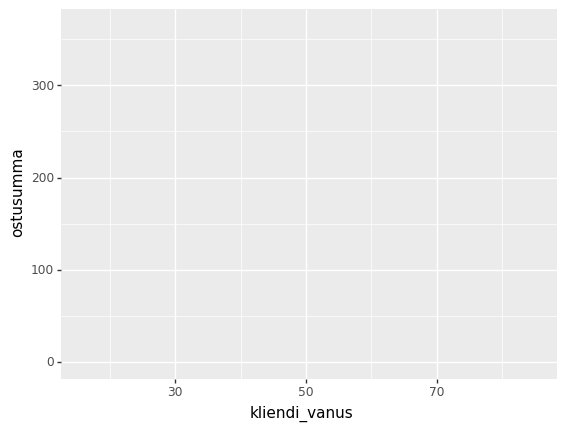

<ggplot: (8729642057265)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatavad tulbad
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="kliendi_vanus", y="ostusumma")))

Kuna ütlesime esimese kihiga ainult seda, millist osa millisest andmestikust vaadata, siis pole me veel tegelikult joonistamiseni jõudnud. Hetkel kuvab plotnine meile üksnes tühja graafiku. Nüüd jõuame teise kihi juurde, milles küsime andmete kindlal viisil kujutamist. 

##3.1 Hajuvusdiagramm 

Alustame näiteks **hajuvusdiagrammiga**, mille joonistamiseks on plotnine teegis olemas funktsioon **geom_point()**.

**NB!** Ära unusta, et kahe kihi vahele tuleb lisada + märk. 



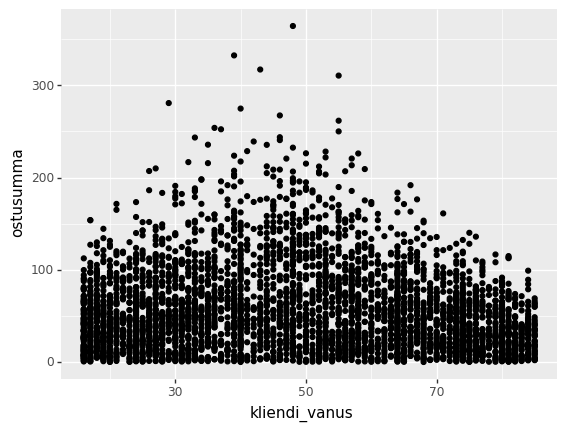

<ggplot: (8729642132537)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatavad tulbad
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="kliendi_vanus", 
                          y="ostusumma")) +
           #teine kiht - küsime ülal defineeritud andmetel hajuvusdiagrammi
           p9.geom_point())

Saime tulemuseks graafiku, kus iga punkt kujutab ühe tehingu asukohta kahemõõtmelisel skaalal. Näiteks punkt asukohaga [39, 365] kujutaks tehingut, mille sooritas 39 aastane klient ja mille ostusummaks oli 365 eurot.

**Ülesanne:** Milliseid trende ostusummades võib näha käesolevalt jooniselt? Oleme selle andmestiku ise loonud ja sellesse teatud loogika sisse ehitanud, kas suudate selle ära arvata?<br>
Vastus: 

--------------

Eelmises praktikumis vaatasime, et kaardi, arve ja sularahaga tehtud tehingute keskmised väärtused olid pisut erinevad. Saame vaadata, kas see erinevus ka jooniselt välja tuleb. Selleks värvime iga erineva maksevahendiga tehtud tehingud erinevat värvi. 

Andmeid valides mainime, et veergu "maksevahend" tuleks kasutada värvimiseks.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


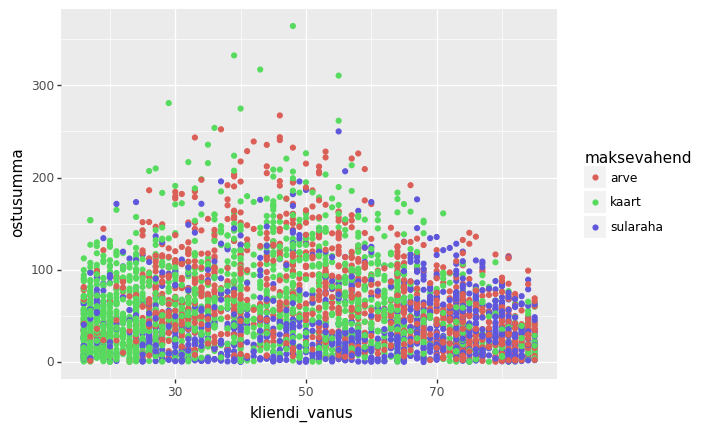

<ggplot: (8729642006165)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatavad tulbad
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="kliendi_vanus", 
                          y="ostusumma",
                          color="maksevahend")) + #teeme iga maksevahendi tehingud eri värvi
           #teine kiht - küsime ülal defineeritud andmetel punktdiagrammi
           p9.geom_point())

Näeme, et kui määrame mingi grupi alusel värvi, siis tekib automaatselt kõrvale ka legend, kust värvide tähendusi näha saab.

Siin joonisel näeme mõlema muutuja - ostusumma ja vanuse mõju maksevahendi valikule. Kindlasti ainult joonisest ei piisa analüüsitulemusena, tuleks ka ikkagi mingite gruppide keskmised arvutada ja neid võrrelda. Joonise vaatamine aga on esimene ja informatiivne samm- saame aimu, kas üldse on mingi efekt.

**Ülesanne:**<br>
- Kas ostusumma muudab klientide maksevahendi valikut?
- Kas eri vanuses inimesed kasutavad erinevaid maksevahendeid?

------------------------
Et graafik oleks ilusam ja loetavam, võime ise valida ka näiteks telgede nimetused. Proovime.

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatavad tulbad
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="kliendi_vanus", 
                          y="ostusumma",
                          color="maksevahend")) #teeme iga maksevahendi tehingud eri värvi
           #teine kiht - küsime ülal defineeritud andmetel punktdiagrammi
           + p9.geom_point()
           #kolmas kiht - x telje nimi
           + p9.xlab("Kliendi vanus aastates")
           #neljas kiht - y telje nimi
           + p9.ylab("Tehingule kulunud summa eurodes"))


##3.2 Tulpdiagramm

Lisaks punktdiagrammile võib meil vaja minna ka tulpdiagrammi. Tulpdiagrammi x-teljel on alati mingi kategooriline tunnus. Kui me y-telje väärtust eraldi ei määra, siis kujutab histogramm lihtsalt erinevate variantide esinemissagedusi. Seega joonis loeb x-teljel olevate väärtuste esinemiskorrad kokku ja kuvab need.

Nii saamegi tulpdiagrammi abil vaadata, kui palju tehinguid tehti erinevates linnades.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


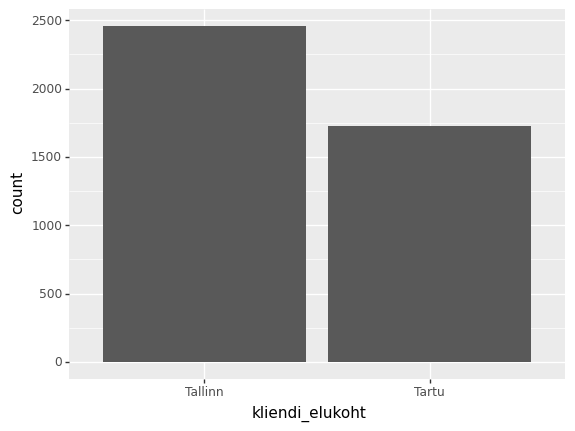

<ggplot: (8729641877769)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="kliendi_elukoht"))
    #teine kiht - lisame tulpdiagrammi
    + p9.geom_bar())

Samuti saame visualiseerida, kui paljude tehingute eest eri maksevahenditega tasuti.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


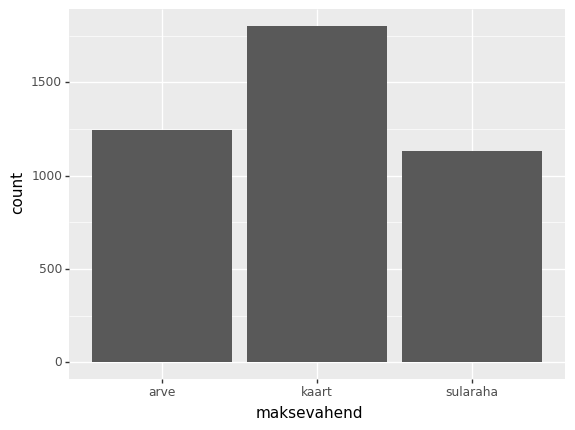

<ggplot: (8729641998045)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="maksevahend"))
    #teine kiht - lisame tulpdiagrammi
    + p9.geom_bar())

Võib-olla soovime vaadata, kas erinevates linnades erineb see, kui palju makstakse kaardi, sularaha või arvega. Saame sedagi ühel joonisel kuvada. Loeme kokku tehingud kummagi linna jaoks ning värvime iga maksevahendi osa eri värvi.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


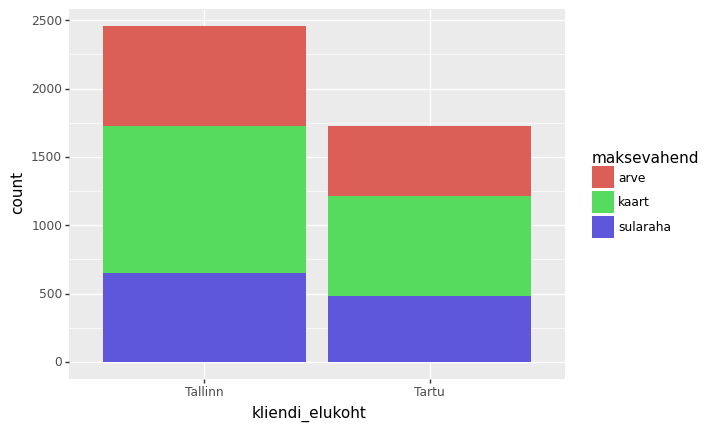

<ggplot: (8729642006225)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="kliendi_elukoht",
                          fill="maksevahend",
                          )) #värv sõltub maksevahendist
    #teine kiht - lisame tulpdiagrammi
    + p9.geom_bar())

##3.3 Karpdiagramm

Kas mäletate, et eelmises praktikumis võrdlesime eri maksevahendite kaupa tehingute andmestiku statistilisi näitajaid? Saime sealt teada, et keskmine ostusumma on kaardi, sularaha ja arvega makstud tehingute puhul pisut erinev - arvega makstute seas oli see ülejäänutest kõrgem. Vaatame, kas andmeid visualiseerides jõuame sama tulemuseni.

Selle jaoks sobib hästi **karpdiagramm** ehk **boxplot**, mis koosneb karbist, mille ülemine ning alumine äär vastavad 25. ja 75. protsentiilile ning kasti keskel olev joon **mediaanile**. Kastidest väljapoole joonistatakse eraldi **võõrväärtused** ehk andmete tavalisest väärtusvahemikust palju suuremad või väiksemad väärtused. 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


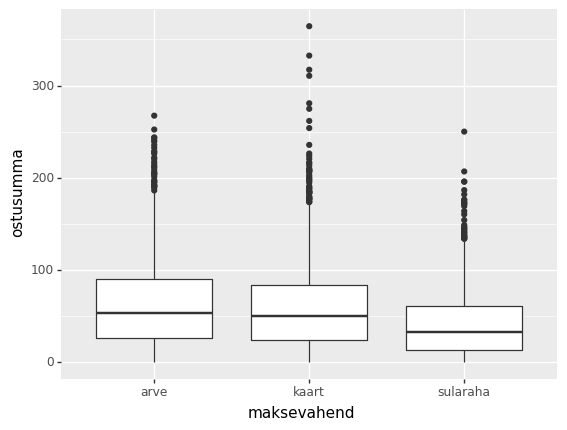

<ggplot: (8729641931289)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="maksevahend",
                          y="ostusumma")) #värv sõltub maksevahendist
    #teine kiht - lisame tulpdiagrammi
    + p9.geom_boxplot())

Kuna praegu on meil y-teljel näidatud üsna vähe arvulisi väärtusi, siis on raske joonisele peale vaadates öelda, kui suur näiteks keskmine ostusumma igas kategoorias on. Kui tahame, võime küsida rohkemate numbrite kuvamist y-teljel. Selleks anname ette vahemiku, mis arve me teljel näha soovime ja kui pikkade sammude järelt väärtuseid peaks kuvama. Vahemiku määramiseks saame kasutada näiteks **numpy** teeki, mis on mõeldud erinevate matemaatiliste arvutuste jaoks. Nagu kõik muud teegid, tuleb ka see importida.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


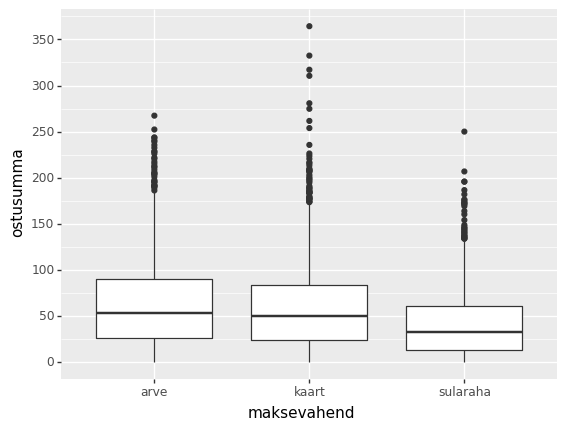

<ggplot: (8729641280117)>

In [ ]:
#impordime numpy
import numpy as np

#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="maksevahend",
                          y="ostusumma")) #värv sõltub maksevahendist
    #teine kiht - lisame tulpdiagrammi
    + p9.geom_boxplot()
    #kolmas kiht - täpsustame, et tahame y-teljel näha ostusummasid iga 50 euro tagant
    #mitte iga 100 euro tagant nagu praegu
    + p9.scale_y_continuous(breaks=[0,50,100,150,200,250,300,350]))#np.arange(0, 400, 50)))

##3.4 Viiulikujuline joonis (*violin plot*)

Kui meil on vaja kujutada pidevate arvuliste tunnuste jaotumist, siis on tavaks kasutada histogrammi. Selleks jagame arvulise tunnuse (näiteks ostusumma) teatud arvu kategooriatesse, kus igas kategoorias on mingisse kindlasse vahemikku kuuluvad arvud. Näiteks esimese grupi moodustavad arvud vahemikus -20 kuni 20, järgmise 20-60 jne. Antud juhul küsime Pythonilt 10 kategooria loomist ja ostusummade nende vahel jagamist. Seejärel joonistame histogrammi, mis näitab, kui palju igasse vahemikku kuuluvaid tehinguid oli. 

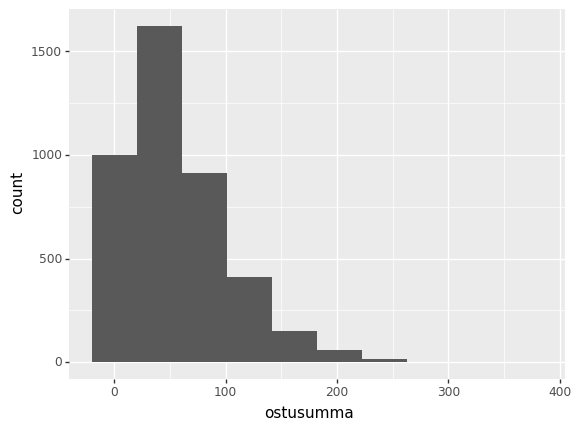

<ggplot: (8729641277849)>

In [ ]:
(p9.ggplot(data=andmed_df,
           mapping=p9.aes(x="ostusumma")) #x teljel kujutame ostusumma väärtusi
                                          #y telje väärtust ei määra, see on vaikimisi count
    + p9.geom_histogram(bins=10) #määrame, mitmesse vahemikku ostusummad jagada
)

Kui me soovime aga vaadata jaotusi mitme tingimuse alusel, näiteks joonistada ostusummade jaotused erinevate maksevahendite korral, võib osutuda kasulikuks "viiulikujuline joonis". Muidugi võiks ka lihtsalt joonistada kolm histogrammi kas eraldi joonistala või üksteise peale, aga kogemus näitab, et just viiulgraafik võimaldab visuaalselt väga hästi jaotusi võrrelda.

Eelmise joonise histogrammil näitas tulba kõrgus seda, mitu tehingut sellises ostusumma väärtuse kategoorias tehtud on. Viiulgraafikute puhul paneme x-teljele kõrvuti 3 erinevat maksevahendit ning neist igaühe kohta joonistatakse üks viiul. Y-teljel on kujutatud ostusumma. Viiuli paksus konkreetse ostusumma väärtuse juures näitab, kui palju kõigist selle maksevahendiga tasutud tehingutest olid selle konkreetse summaga.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


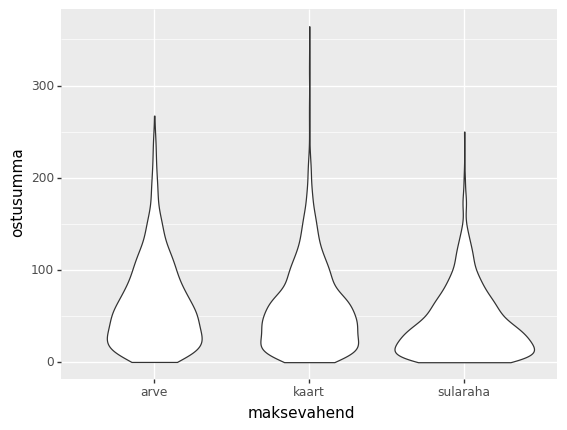

<ggplot: (8729641304613)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="maksevahend",
                          y="ostusumma")) 
    #teine kiht - lisame tulpdiagrammi
    + p9.geom_violin())

Viiulgraafik näitab y-teljel oleva tunnuste väärtuste jaotust. Väärtused on normaliseeritud, ehk annavad kokku 100%. Jaotus on peegeldatud keskse telje suhtes, lisades ruumilisust. Silm haarab pindala hästi ja suudab võrrelda erinevate "viiulite" kuju.



Näiteks suudame kohe tajuda, et sularaha ostusummad on üldiselt väiksemad kui teistel maksevahenditel. 




##3.5 Joondiagramm

Joondiagrammiga on hea kujutada muutusi ajas. Näiteks võime vaadata, kui palju on aastate jooksul muutunud eri maksevahenditega tehtud tehingute arv. Proovige enne jooniste vaatamist mõelda, milliseid trende võiks selline uuring väljendada. 

Antud juhul on meil andmetes tehingud kuupäeva täpsusega. Kõiki kuupäevi ei ole mõistlik joonisele panna, kuna need lihtsalt ei mahu sinna ja kuupäevade alamhulkade vaatamine ei oleks kuigi informatiivne, kuna tihti on päevas vaid üks tehing. Seetõttu lisame oma andmetesse uue veeru, kus kajastub ainult tehingu sooritamise aasta. Seejärel saame eri maksevahenditega tehingute arvud kokku lugeda aasta lõikes ning hoopis seda ülevaadet kujutada. 

Kuupäevade veeru aastateks teisendamise kood on all olemas, kuid sellest ei pea sa veel aru saama. Igaks juhuks kirjutasin kommentaaridesse väikese selgituse, juhuks kui keegi soovib süveneda.

In [ ]:
#loo uue seeria kus igale kuupäevale vatab selle aastaarv
#esmalt lõikan kuupäeva "-" kohalt juppideks. Saan järjendi kus on [aasta, kuu, päev]
#nt ["2013", "2", "12"]. Seejärel võtan sealt indekseerimisega esimese elemendi ehk aasta
#for tsükli abil teen seda iga andmetes oleva kuupäeva jaoks
#kandiliste sulgude abil väljendan, et soovin aastaarve järjendina

aastad = [int(el.split("-")[0]) for el in list(andmed_df.tehingu_kuupäev)]

#sulle tuttava for tsükliga näeks see kood välja selline:
#aastad = []
#for kuupäev in list(andmed_df.tehingu_kuupäev): #võtan kuupäevade tulba järjendina ja käin tsükliga läbi
    #tükid = kuupäev.split("-") #teen kuupäevast .split() abil järjendi [aasta, kuu, päev]
    #aasta = int(tükid[0]) #võtan ainult aasta täisarvuna
    #aastad.append(aasta) #lisan aasta aastate järjendisse

#lisan aastaarvude tulba andmefreimi
andmed_df["tehingu_aasta"] = aastad
display(andmed_df.head())

,tehingu_id,tehingu_kuupäev,kliendi_id,ostusumma,maksevahend,kliendi_vanus,kliendi_elukoht,tehingu_aasta
0,1,2015-09-04,1,146.72,arve,27,Tallinn,2015
1,2,2015-05-15,2,86.96,sularaha,57,Tartu,2015
2,3,2017-05-23,2,17.68,kaart,57,Tartu,2017
3,4,2017-10-24,2,83.84,arve,57,Tartu,2017
4,5,2015-10-13,2,31.52,arve,57,Tartu,2015


Nüüd grupeerime oma andmed tehingu aastaarvu ja maksevahendi kaupa ning loeme kokku, mitu tehingut igasse komplekti (maksevahend+aasta) kuulub.

Andmete ühe tunnuse abil grupeerimist oleme varasemalt juba vaadanud. Kui me grupeeriks lihtsalt näiteks aasta kaudu, siis saaksime ülevaate, mitu tehingut igal aastal tehti.

In [ ]:
grup_üks_tunnus = andmed_df.groupby(["tehingu_aasta"])["tehingu_id"].count()
print(grup_üks_tunnus.head())

tehingu_aasta
2013    260
2014    440
2015    647
2016    827
2017    943
Name: tehingu_id, dtype: int64


Meil on aga vaja näha tehingute arvu iga maksevahendi kohta. Muud siin muutma ei peagi kui et anname **.groupby()** funktsioonile argumendiks järjendi kahe tunnusega.

In [ ]:
#grupeerime aasta ja maksevahendi kaupa, loeme tehingud kokku
tehingute_arv = andmed_df.groupby(["tehingu_aasta", "maksevahend"])["tehingu_id"].count()
#määrame tehingute arvu tulbanimeks "mitu_tehingut"
tehingute_arv = tehingute_arv.reset_index(name="mitu_tehingut")
display(tehingute_arv.head())

,tehingu_aasta,maksevahend,mitu_tehingut
0,2013,arve,85
1,2013,kaart,106
2,2013,sularaha,69
3,2014,arve,120
4,2014,kaart,192


Nüüd joonistame nende andmete kohta ka graafiku, mis näitaks, kuidas tehingute arv ajas muutunud on.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


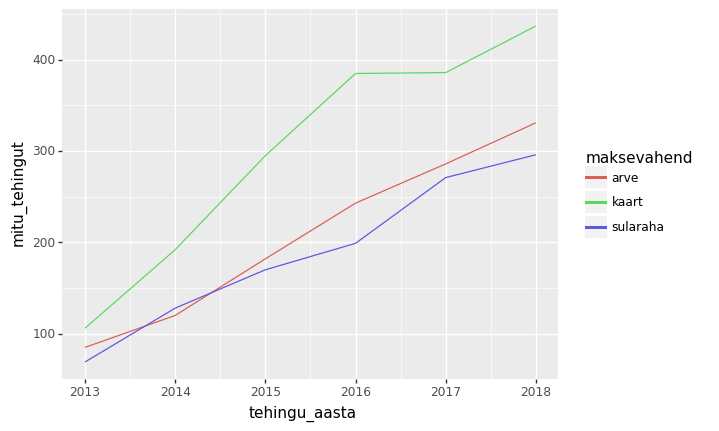

<ggplot: (8729641322609)>

In [ ]:
(p9.ggplot(data=tehingute_arv,
           mapping=p9.aes(x="tehingu_aasta",
                          y="mitu_tehingut",
                          color="maksevahend"))
    + p9.geom_line()
)

**Ülesanne:** Kirjelda, mida siit graafikult välja saame lugeda. Mida saame öelda eri maksevahendite populaarsuse kohta?

##3.6 Mitu joonist ühel graafikul -*facet*

Erinevatesse gruppidesse kuuluvate andmete võrdlemiseks on tihti mugav nende graafikuid kõrvuti vaadelda. Tuletame meelde histogrammi, mida ülalpool vaatasime. Jagame klientide vanused kaheksasse gruppi ning vaatame tehingute arvu igas grupis.

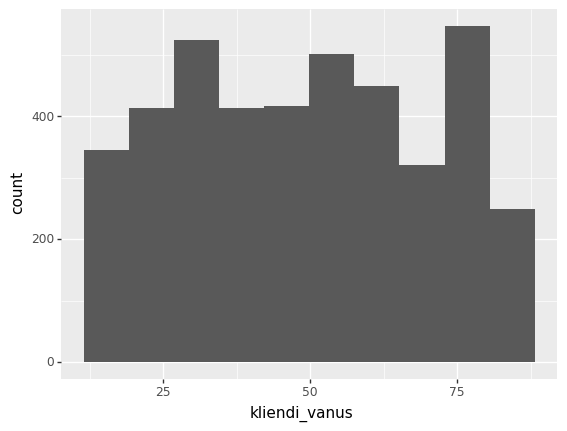

<ggplot: (8729642075397)>

In [ ]:
(p9.ggplot(data=andmed_df,
           mapping=p9.aes(x="kliendi_vanus")) #x teljel jookseb klientide vanus
    + p9.geom_histogram(bins=10) #klientide vanus on jagatud 10 gruppi ehk vahemikku
)

Selliselt jooniselt näeme lihtsalt, kui palju tehinguid iga vanusegrupp teeb. Näiteks alla 25-aastased on kokku teinud üle 600 tehingu, samas kui umbes 80-aastaste tehtud tehinguid on alla 100. Sellest saame näiteks järeldada, et eakaid inimesi käib meie väljamõeldud poes harva. 

Kui meid huvitab aga see, kas kliendi vanusest sõltub ka maksevahendi valik, peaksime vaatama vanusegruppide tehinguid iga maksevahendi kohta eraldi. Teeme iga maksevahendi jaoks histogrammi, kus x-teljel jookseb klientide vanus ning tulpade kõrgus väljendab, mitu tehingut sellises vanusegrupis inimeste poolt antud maksevahendiga tehti.

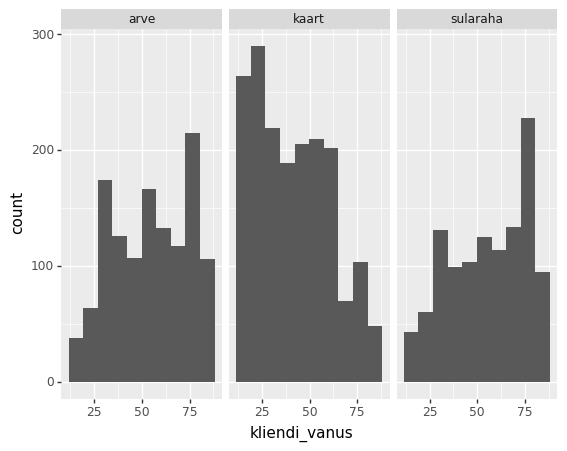

<ggplot: (8729641322521)>

In [ ]:
(p9.ggplot(data=andmed_df,
           mapping=p9.aes(x="kliendi_vanus")) #x teljel jookseb klientide vanus
    + p9.geom_histogram(bins=10) #klientide vanus on jagatud 10 gruppi ehk vahemikku
    + p9.facet_wrap("maksevahend") #jagame joonise kolmeks maksevahendi alusel
)

Näeme näiteks, et alla 25 aastaste klientide puhul on arvega tasutud vähem kui 100 tehingu eest, samas kui kaardimakse on sooritatud umbes 500 tehingu puhul. Siit võime selgesti järeldada, et kõige noorem vanusegrupp meie klientide seas eelistab ülekaalukalt kaardimakseid.

Sarnast infot võime saada ka näiteks viiulgraafiku abil. Alloleval joonisel näeme, et kaardimakse viiul on kõige laiem kõige nooremate inimeste puhul ja arve ning sularahamakse viiulid on samal kõrgusel palju kitsamad. 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


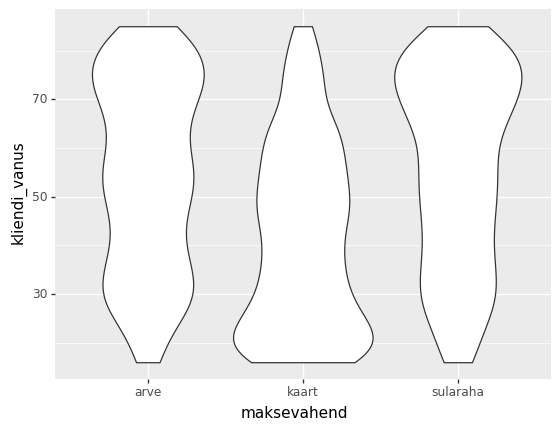

<ggplot: (8729641268513)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = andmed_df,
           mapping=p9.aes(x="maksevahend",
                          y="kliendi_vanus")) 
    #teine kiht - lisame tulpdiagrammi
    + p9.geom_violin())

## Samad joonised MatPlotLibiga

Esmalt joonistasime me hajuvusdiagrammi vanuse ja ostusumma vahel.

Impordime matplotlibi teegi use osa, nimega pyplot ja anname sellele hüüdmine. 

Seejärel loome scatter tüüpi joonise, mille täpset välimust saab paljudel viisidel muuta:
- color: lubab täpikeste värvi muuta
- marker: lubab kasutada märkimiseks näiteks kas täppe('o') või riste ('x')
- s: markekri suurus
- jne (loe plt.scatter dokumentastiooni) 

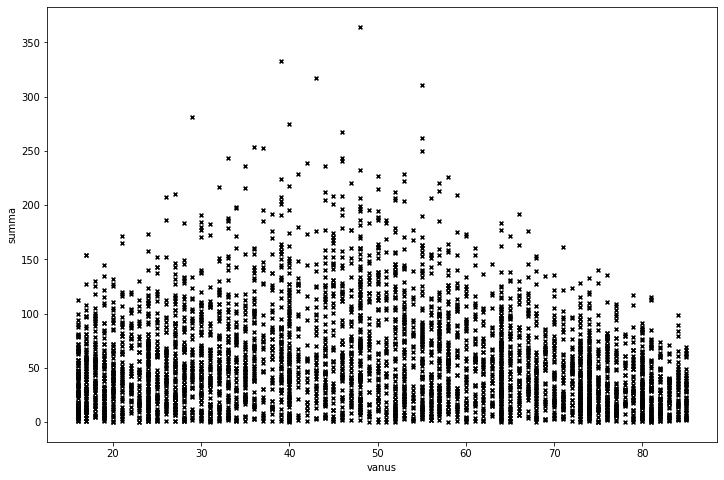

In [ ]:
#see rida aitab lihtsalt joonistel õigesti joonatud olla
%matplotlib inline 

import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,8])
plt.scatter(andmed_df["kliendi_vanus"], andmed_df["ostusumma"],color="black", marker="x", s=15) # siia saab juurde lisada
plt.xlabel("vanus")
plt.ylabel("summa")
plt.show()

Paljudes veebist leitavates näidetes kasutatakse aga hoopis Pandasesse sisse ehitatud visualiseerimisi, mis tegelikult kutsuvad välj matplotlibi sama tüüpi joonist tegeva funktsiooni.

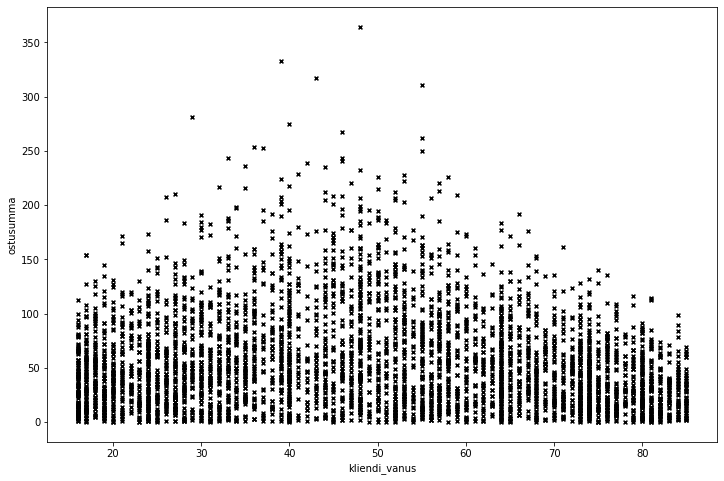

In [ ]:
#Järgnev teeb täpselt sama kui eelnev koodikast:
# lihtsalt pandase andmefreimile on loodud funktsioon, mis teades veergude nimesid
# ning joonise tüüpi (kind=), kutsub välja seda tüüpi pyploti joonise.
# kõik pyplotis olemas olevad valikud on ka siin võimalikud (vt color, s, marker..)

# aga Pandasesse on sisse ehitatud liidestus matplotlibiga!
andmed_df.plot("kliendi_vanus","ostusumma",kind="scatter", color="black",figsize=(12,8),s=15, marker='x') # ja kõik teised atribuudid..

#help(andmed_df.plot)


Edasises vaatame aga peamiselt jooniste tegemist **otse matplotlib.pyplot funktsioonidega, mitte Pandase kaudu**. Põhjuseks on lihtsalt praktikumi koostaja harjumus nii töötada ja tunne, et nii on parem kontroll selle üle, mis ikkagi ekraanile ilmub.

Järgmisega oli meie ülesandeks punktid värvida vastavalt maksevahendile. Plotnine'iga oli see väga lihtne - tuli lisada üks kiht. 

Vaatame kuidas seda pyplotis teha saab.

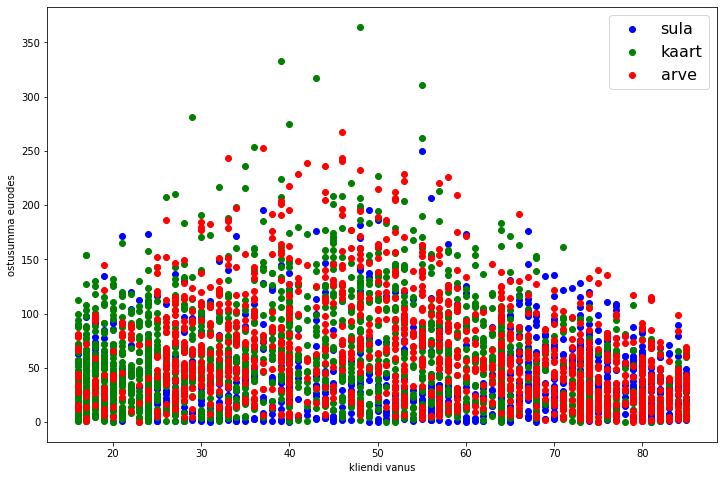

In [ ]:
#Variant 1: loo järjend, mis on sama pikk kui ridade arv tabelist 
# ja mis sisaldab värve, mis värvi iga andmepunkt peaks olema.
# Hetkel aga teeme seda teisiti:

#Variant 2: joonistame värv-värvi (maksevahendi) kaupe punktid

#indekseemie eraldi andmed iga maksevahendi kohta
# seda võib muidugi teha FOR tsükli abil
sula = andmed_df[["kliendi_vanus","ostusumma"]][andmed_df["maksevahend"]=="sularaha"]
kaart = andmed_df[["kliendi_vanus","ostusumma"]][andmed_df["maksevahend"]=="kaart"]
arve = andmed_df[["kliendi_vanus","ostusumma"]][andmed_df["maksevahend"]=="arve"]

#Joonistame ühe kaupa joonised
plt.figure(figsize=(12,8))
plt.scatter(sula['kliendi_vanus'], sula['ostusumma'], color="blue")
plt.scatter(kaart['kliendi_vanus'], kaart['ostusumma'], color="green")
plt.scatter(arve['kliendi_vanus'], arve['ostusumma'], color="red")


#lisame legendi, mis värv millist maksevahendit kujutab
plt.legend(["sula","kaart","arve"], fontsize=16)

#telgede nimede muutmine
plt.xlabel("kliendi vanus")
plt.ylabel("ostusumma eurodes")

plt.show()


#Pandase kaudu tehes:

#ax=sula.plot("kliendi_vanus", "ostusumma",kind="scatter", color="blue", figsize=(12,8))
#kaart.plot("kliendi_vanus", "ostusumma",kind="scatter", color="green", ax=ax)
#arve.plot("kliendi_vanus", "ostusumma",kind="scatter", color="red", ax=ax)

#lisame legendi, mis värv millist maksevahendit kujutab
#plt.legend(["sula","kaart","arve"], fontsize=16)

#telgede nimede muutmine
#ax.set_xlabel("kliendi vanus")
#ax.set_ylabel("ostusumma eurodes")

Järgmisena vaatlesime **tulpdiagramme**, mis näitasid linnade ja maksevahendite esinemissagedusi. 

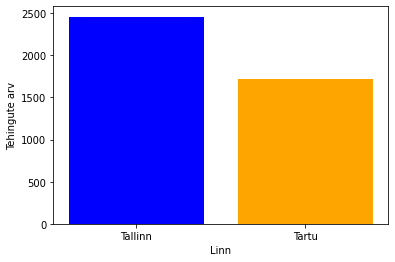

kaart       1801
arve        1247
sularaha    1133
Name: maksevahend, dtype: int64


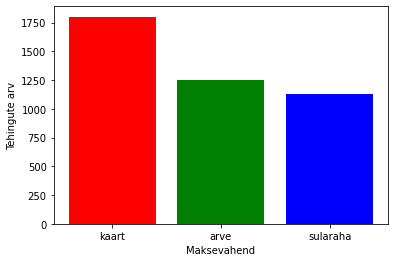

In [ ]:
#print(display(andmed_df))

#pandase kaudu
#andmed_df["kliendi_elukoht"].value_counts().plot(kind="bar", color=["blue", "orange"])
# ja telje nimed jms

esinemine = andmed_df["kliendi_elukoht"].value_counts()
plt.bar(["Tallinn", "Tartu"],esinemine,color=["blue", "orange"])
plt.xlabel("Linn")
plt.ylabel("Tehingute arv")
plt.show()



#pandase kaudu
#andmed_df["maksevahend"].value_counts().plot(kind="bar")
# ja telje nimed jms

esinemine = andmed_df["maksevahend"].value_counts()
print(esinemine)
plt.bar(["kaart", "arve","sularaha"],esinemine,color=["red", "green","blue"])
plt.xlabel("Maksevahend")
plt.ylabel("Tehingute arv")
plt.show()


Veel ägedam on aga joonis, kus näitame maksevahendite kasutamis linna kaupa, värvides linnade kohta tehtud tulpdiarammil tulbad triibuliseks, vastavalt maksevahenditele.

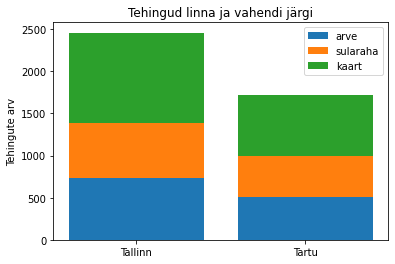

In [ ]:
# nüüd tahame tallinna ja tartu tulpdiagrammi, aga maksevahendi kaupa
import numpy as np # see teek võimaldab teha vektoreid

senine_kõrgus = np.array([0,0]) #see on põhimõtteliselt järjend [0,0], aga targem
# vektoried saab liita [0,0] + [1,2] = [1,2], mitte [0,0,1,2]

fig, ax = plt.subplots() #loome joonise aluse

#et hakkame lisama mitu joonist (tulba eri värvi osad) samale teljestikule, siis
#töötame natuke teisiti. Peame kutsuma välja funktsioone tähendusega "joonis, joonista", 
# mitte "pyplot, joonista", sest pyplot see teeks iga kord uue joonise.
# et samale joonisele mitu asja panna, kustumegi mitte plt.bar, vaid ax.bar

for mv in andmed_df["maksevahend"].unique(): #iga maksevahendi jaoks
  alamhulk = andmed_df[andmed_df["maksevahend"]==mv] #leiame selle maksevahendiga read
  ax.bar(["Tallinn", "Tartu"], alamhulk["kliendi_elukoht"].value_counts(), label=mv, bottom=senine_kõrgus) #joonistame teatud kõrgusele, et eri värvi kastid oleks üksteise otsas 
  senine_kõrgus = senine_kõrgus + alamhulk["kliendi_elukoht"].value_counts() #jätame meelde kui kõrge post juba oma

ax.set_ylabel('Tehingute arv')
ax.set_title('Tehingud linna ja vahendi järgi')
ax.legend()

plt.show()

#saab ka pandase group by abil, ma arvan, aga for tsüklit on ikka vaja. https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

Järgmisena kasutasime **karpdiagrammi**. Ka see on üsna lihtne.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


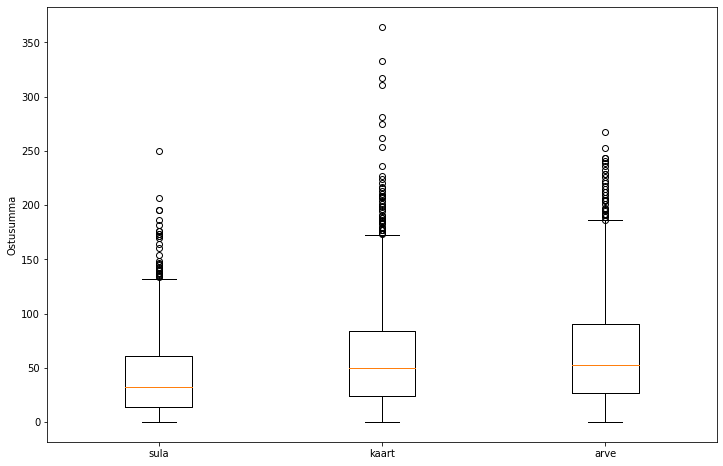

In [ ]:
#loome kolm ostusummade pandese seeriat
sula = andmed_df[andmed_df["maksevahend"]=="sularaha"]["ostusumma"]
kaart = andmed_df[andmed_df["maksevahend"]=="kaart"]["ostusumma"]
arve = andmed_df[andmed_df["maksevahend"]=="arve"]["ostusumma"]
#print(display(sula))

#anname karpdiagrammile ette need kolm seeriat ja ta saab ise aru, et need on vaja eraldi karpidena kõrvuti panna
fig = plt.figure(figsize=(12,8))
plt.boxplot([sula,kaart,arve],labels=["sula", "kaart","arve"])
plt.ylabel("Ostusumma")
plt.show()

Samadel andmetel joonistasime ka **viiuldiagrammi**.
Matplotlibiga joonistades on väikeseks tülikohaks siin see, et pyplot seda funktsiooni ei sisalda, küll on see aga olemas veidi teisel kujul. 

<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


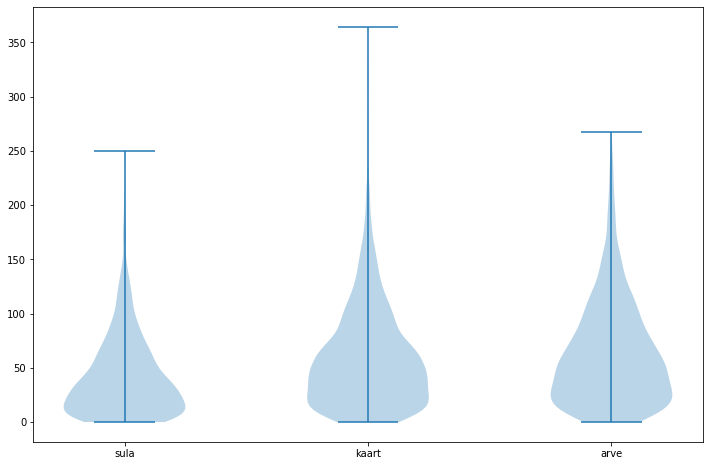

In [ ]:

fig, ax = plt.subplots(figsize=(12,8)) #loome joonise aluse

# Ennist kasutasime pandase seeriaid, seekord on kahjuks vaja andmeid vektori kujul
# andmed saame seeriast kätte .values abil
sula = andmed_df[andmed_df["maksevahend"]=="sularaha"]["ostusumma"].values
kaart = andmed_df[andmed_df["maksevahend"]=="kaart"]["ostusumma"].values
arve = andmed_df[andmed_df["maksevahend"]=="arve"]["ostusumma"].values
print(type(sula))

#joonist peame välja kutsuma joonise kaudu, (ax. )
ax.violinplot([sula,kaart,arve],[0,1,2])
#plt.ylabel("Ostusumma") #sama kui ax.set_ylabel("Ostusumma")

#paneme viiulitele nimed alla
ax.set_xticks([0,1,2]) #määrame kuhu need ilmuvad
ax.set_xticklabels(["sula","kaart","arve"]) #määrame teksi, mis ilmub
plt.show()

Järgmisena tegime ühe aegrea visualiseerimise.
Siinkohal me kuu täpsusega tehingute arvu leidmist uuesti tegema ei hakka, meil oli selleks muutuja "tehingute_arv"

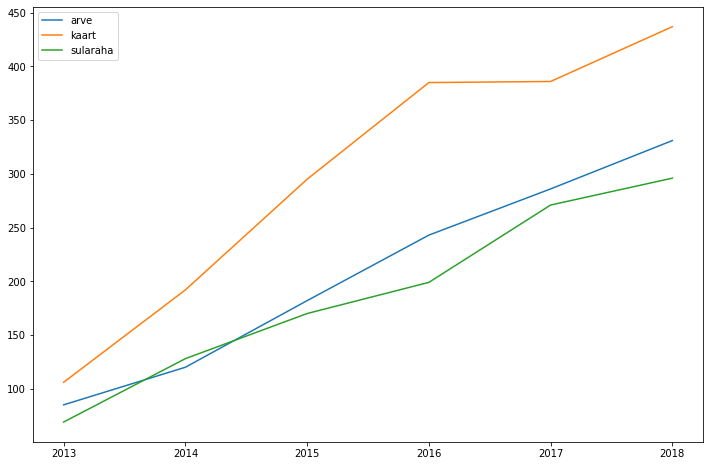

In [ ]:
#display(tehingute_arv)

fig=plt.figure(figsize=[12,8])

for mv in tehingute_arv["maksevahend"].unique(): #iga maksevahendi kohta
  selle_mv = tehingute_arv[tehingute_arv["maksevahend"]==mv] #leiame vastavad read
  plt.plot(selle_mv["tehingu_aasta"],selle_mv["mitu_tehingut"], label=mv) #joonistame 
  
plt.legend()
plt.show()

Viimaks nägime mitme alam-joonise tegemist samal joonisel.
Selle joaks on matplotlibis *subplot*id.

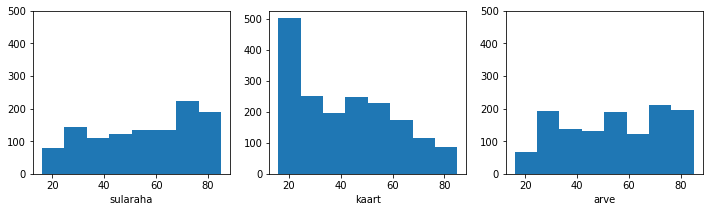

In [ ]:
#kaks joonis ühel joonisel:
#vanus vs kaart/arve/sula

#loome joonise ja alamjoonised (toorikud)
f = plt.figure(figsize=(12,3))
ax = f.add_subplot(131) #lisa alamjoonis. 131 tähendab, et meil on 1 rida, 3 veergu ja käesoleva onjekti lisame kohale 1
ax2 = f.add_subplot(132) #lisa alamjoonis. 131 tähendab, et meil on 1 rida, 3 veergu ja käesoleva onjekti lisame kohale 2
ax3 = f.add_subplot(133) #lisa alamjoonis. 131 tähendab, et meil on 1 rida, 3 veergu ja käesoleva onjekti lisame kohale 2

#histogrammitüüpi joonised
#saaks muidugi FOR tsükliga
ax.hist(andmed_df[andmed_df["maksevahend"]=="sularaha"]["kliendi_vanus"], bins=8)
ax.set_xlabel("sularaha")
ax.set_ylim([0,500])

ax2.hist(andmed_df[andmed_df["maksevahend"]=="kaart"]["kliendi_vanus"],bins=8)
ax2.set_xlabel("kaart")
ax3.set_ylim([0,500])


ax3.hist(andmed_df[andmed_df["maksevahend"]=="arve"]["kliendi_vanus"],bins=8)
ax3.set_xlabel("arve")
ax3.set_ylim([0,500])

plt.show()
